# About the Jupyter Notebook
In this Jupyter Notebook we are going to look at the accuracy of the neural network designed to classify handwritten digits. We are going to plot the accuracy of the network in relation small changes in all major hyper parameters such as number of hidden layers, number of neurons per layer, number of epochs, mini batch size and learning rate.

## Representaion of the Network
The network is going to be represented as something simmilar to: **a_784.96.48.10_5_25_0.08_e**
- Here the 'a' at the beginning stands for accuracy. The dictionary also stores 'W' and 'b', which are weights and biases for the same network.
- '784.96.48.10' tells us the number of neurons per layer.
- '10_5_25_0.08' tells us the number of epochs, mini back size, and learning grade respectively.
- 'e' at the end stands for the hyper parameter that was changing (epochs in this case). Other options include 'nl' for number of layers, 'm' for mini batch size, 'l' for learning rate, 'tr' for testing on training data, 'te' for testing on testing data.

## Importing the Trained Networks
First, we are going to import all the networks that were trained in [trained_networks.py](trained_networks.py)


In [3]:
import pickle
import data_loader

with open("model_parameters.pkl", "rb") as file:
    loaded_parameters = pickle.load(file)

# Testing the Accuracy of the Network

## Accuracy of the Network With Three Layers
Here we are experimenting with a neural network that has three layers. We are varying the amount of neurons per layer to see how that impacts the overall accuracy. We wanted to start off with a neural network that has three layers as it is not always better to have more parameters in the neural network. The number of parameters you have generally depends on how much training data you have. 

In this as well as the next section we will try to find out what the optimal number of layers and the optimal number of neurons per layer is. 

From the graph below, we can see that having a lot of neurons in the hidden layer does not help with the accuracy of network. As we will see in the next section, having a lot of neurons in the second to last layer is not optimal. 

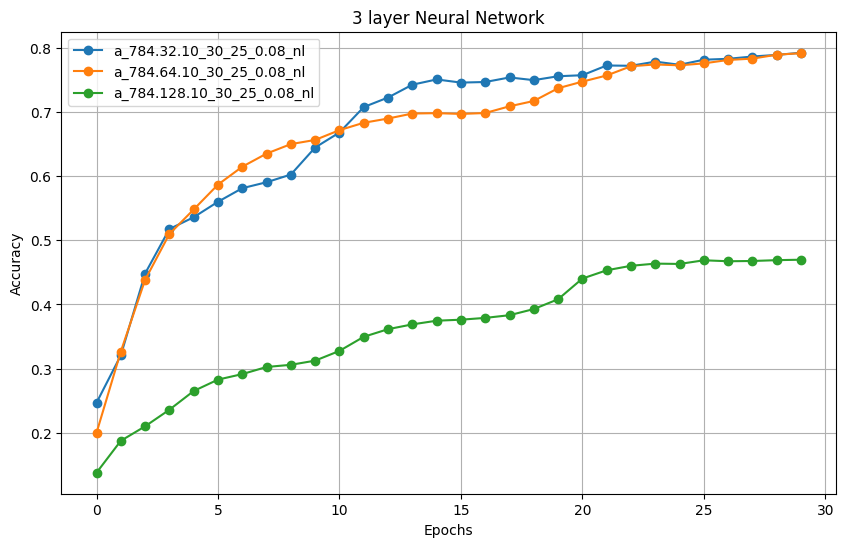

The training took for a_784.32.10_30_25_0.08_nl netwrok took 6 minutes and 48.46 seconds.
The training took for a_784.64.10_30_25_0.08_nl netwrok took 9 minutes and 24.92 seconds.
The training took for a_784.128.10_30_25_0.08_nl netwrok took 14 minutes and 43.0 seconds.


In [4]:
data_loader.create_plot_from_data(loaded_parameters, 
                                  ['a_784.32.10_30_25_0.08_nl', 'a_784.64.10_30_25_0.08_nl', 
                                   'a_784.128.10_30_25_0.08_nl'], '3 layer Neural Network')

## Accuracy of the Network With Four Layers
Here we are experimenting with the neural network that has four layers. We are varying the amount of neurons in the two hidden layers. As the number of parameters is quite high relative to the number of training samples, we will not be experimenting with any neural networks that have five layers or more. 

There can be many interpretations for why the network with 784_128_28 layers has the best performance here, but in my opinion, it has something to do with the number of parameters. The number of neurons in the second to last layer is relatively low and the other hidden layer also does not have too many parameters.

If we compare the accuracy of the 784_128_32 network to the networks with only three layers, we can see that we can achieve almost 90% accuracy with the four layered network, while we were only getting around 80% with three layers.

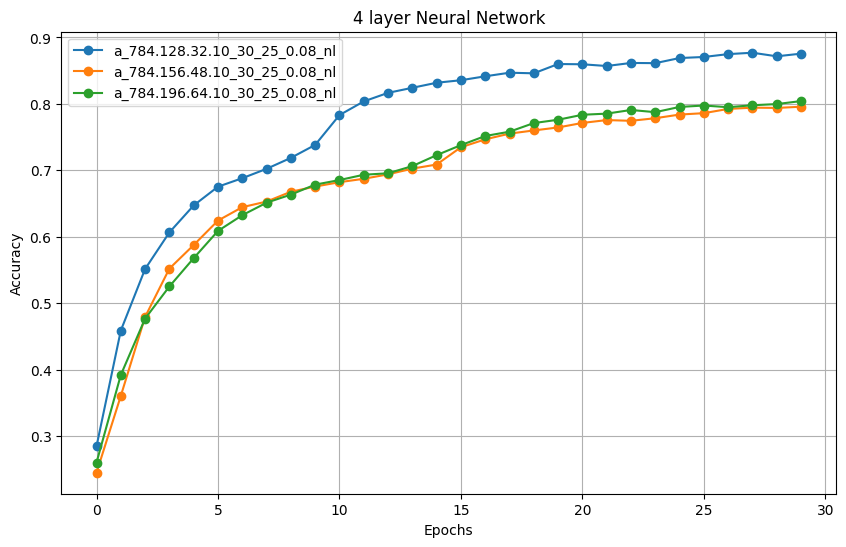

The training took for a_784.128.32.10_30_25_0.08_nl netwrok took 16 minutes and 6.54 seconds.
The training took for a_784.156.48.10_30_25_0.08_nl netwrok took 18 minutes and 57.1 seconds.
The training took for a_784.196.64.10_30_25_0.08_nl netwrok took 26 minutes and 40.38 seconds.


In [5]:
data_loader.create_plot_from_data(loaded_parameters, 
                                  ['a_784.128.32.10_30_25_0.08_nl', 'a_784.156.48.10_30_25_0.08_nl', 
                                   'a_784.196.64.10_30_25_0.08_nl'], '4 layer Neural Network')

## Accuracy of the Network Based on the Number of Epochs
Based on the results from the previous chapter, we are going to fix the number of layers, and the number of neurons per layer for the next three chapters and vary the other hyper parameters.

In this section we will observe, how the accuracy of the network changes when we vary the number of epochs. We would expect the network to learn quickly in the beginning. The only problem we could encounter here is with overfitting. That means that the network's accuracy would be really high on training data while it would start to stagnate on testing data. 

As we can see from the graph below, the difference in accuracy on training and testing data is not that big. While we can see that te netwrok starts to stagnate after 200 epochs, if we are testing it with testing data, it is still gradually improving if we are testing it on training data.

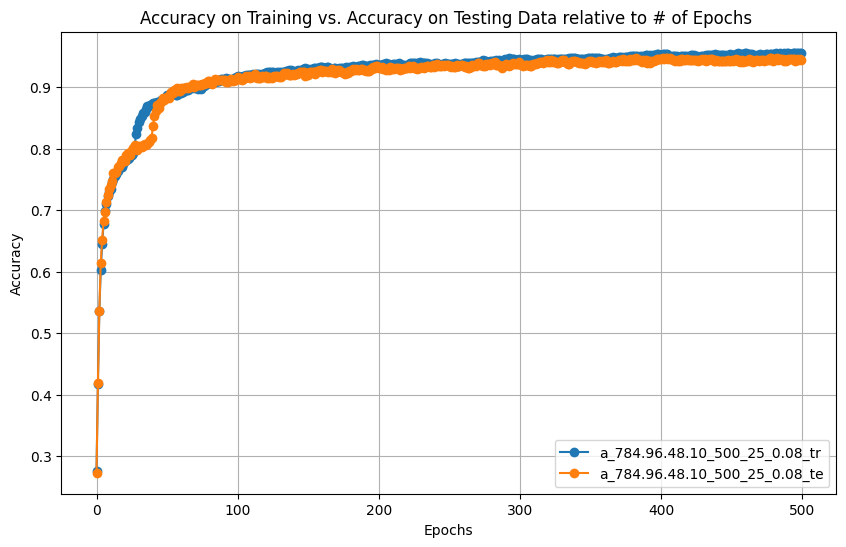

The training took for a_784.96.48.10_500_25_0.08_tr netwrok took 274 minutes and 7.29 seconds.
The training took for a_784.96.48.10_500_25_0.08_te netwrok took 232 minutes and 56.77 seconds.


In [6]:
data_loader.create_plot_from_data(loaded_parameters, 
                                  ['a_784.96.48.10_500_25_0.08_tr', 'a_784.96.48.10_500_25_0.08_te'], 
                                   'Accuracy on Training vs. Accuracy on Testing Data relative to # of Epochs ')

## Accuracy of the Network Based on Mini Batch Size
In this section we will observe how the accuracy, the network changes when we vary the size of mini batches. Instead of computing gradients for every training example in the training data set and updating the weights once per epoch, we use mini batches to speed up the learning process. While each step of gradient descent might not be as accurate we are significantly reducing the training time. 

But if the batches are too small the network will be very inefficient in minimizing the cost function. In the graph below, we can see that the network starts out pretty accurate, but is unable to generalize. In some cases, the batch size of one might be a good fit for the model, but in this case, it resolves in the network being unable to learn. 

On the other side, if the batches are too big, the network is going to learn slowly and we are going to lose some of the efficiency we gained by introducing batches.

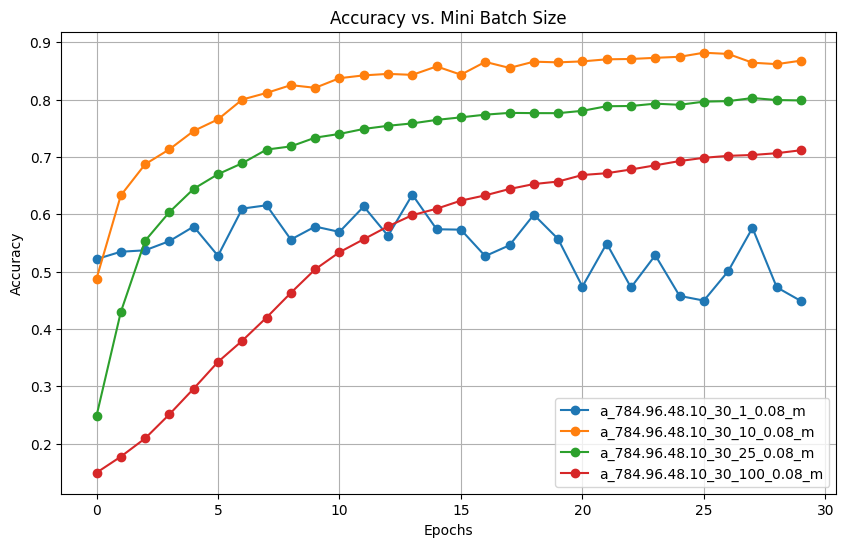

The training took for a_784.96.48.10_30_1_0.08_m netwrok took 20 minutes and 16.73 seconds.
The training took for a_784.96.48.10_30_10_0.08_m netwrok took 13 minutes and 50.24 seconds.
The training took for a_784.96.48.10_30_25_0.08_m netwrok took 13 minutes and 17.18 seconds.
The training took for a_784.96.48.10_30_100_0.08_m netwrok took 13 minutes and 38.88 seconds.


In [7]:
data_loader.create_plot_from_data(loaded_parameters, 
                                  ['a_784.96.48.10_30_1_0.08_m', 'a_784.96.48.10_30_10_0.08_m', 
                                   'a_784.96.48.10_30_25_0.08_m', 'a_784.96.48.10_30_100_0.08_m'], 
                                   'Accuracy vs. Mini Batch Size')

## Accuracy of the Network Based on Learning Rate
In this setion we will observe how the accuracy of the network changes when we vary the learning rate. 

If the learning rate is too big, the corrections that the network makes to the weights and biases after a step of gradient descent are to be too big and we don't expect the network to become very efficient. That can be confirmed on the graph below, where we can see that in the beginning the network learns very quickly but it's accuracy fails to go above 80%.

On the other hand, if the learning rate is too small, the network learns too slowly. But we can combine the two approaches if we wanted to make the neural netwrok very effecient. In the beginning we would have a bigger learning rate and then gradually make it smaller to fine tune the network.

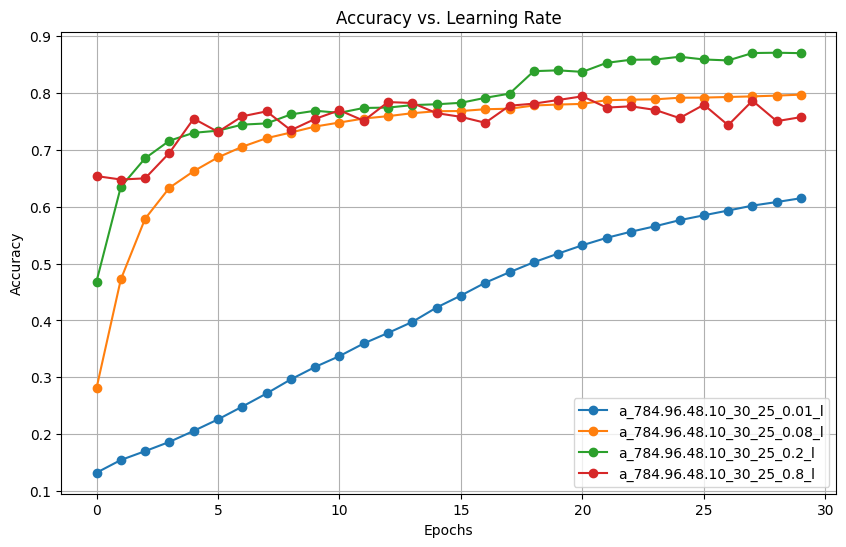

The training took for a_784.96.48.10_30_25_0.01_l netwrok took 17 minutes and 54.76 seconds.
The training took for a_784.96.48.10_30_25_0.08_l netwrok took 28 minutes and 27.48 seconds.
The training took for a_784.96.48.10_30_25_0.2_l netwrok took 75 minutes and 19.18 seconds.
The training took for a_784.96.48.10_30_25_0.8_l netwrok took 16 minutes and 49.64 seconds.


In [8]:
data_loader.create_plot_from_data(loaded_parameters, 
                                  ['a_784.96.48.10_30_25_0.01_l', 'a_784.96.48.10_30_25_0.08_l', 
                                   'a_784.96.48.10_30_25_0.2_l', 'a_784.96.48.10_30_25_0.8_l'],
                                   'Accuracy vs. Learning Rate')

# Imported Image Guessing
At this point, I took the the neural network with the highest accuracy (784.96.48.10_500_25_0.08_te) and made it ready to do what it was designed to do.

The reader can add images of hand drawn digits into the 'input_images' folder. If the folder doesn't exist, create one with that name and place it in the same folder that the [data_loader.py](data_loader.py) file is in.  
Make sure that the input images are either JPEG/JPG or PNG format, and that the digit does not appear too small in the image. One image is provided below as a sample. 

Then the network is going to guess what the digit is.

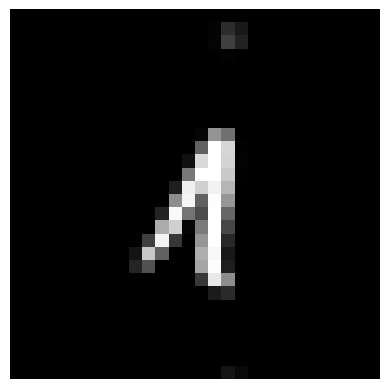

The network's guess for the image is 1.


In [12]:
from network import Network
import matplotlib.pyplot as plt
import numpy as np

network = Network([784, 96, 48, 10])
network.weights = loaded_parameters['W_784.96.48.10_500_25_0.08_te']
network.biases = loaded_parameters['b_784.96.48.10_500_25_0.08_te']
network.accuracy = loaded_parameters['a_784.96.48.10_500_25_0.08_te']
images = data_loader.read_test_data()

for image in images:
    guess = np.argmax(network.feedforward(image))
    image = image.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
    print(f'The network\'s guess for the image is {guess}.')